In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 0

In [478]:
supacoolsoft_path= "../data/supahcoolsoft.csv"

df= pd.read_csv(supacoolsoft_path)
df

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
0,E001,Ann,Larsson,41,Product Management,AI Specialist,60777.0,ann.larsson@supacoolsoft.se,+46 (0)25 37 22 30
1,E002,Emma,Kim,52,Engineering,Database Administrator,46020.0,emma.kim@supacoolsoft.se,+46 (0)855 449 66
2,E003,Barbro,Andersson,59,DevOps,Data Scientist,48503.0,barbro.andersson@supacoolsoft.se,+46 (0)47 61 73 44
3,E004,Magnus,Söderström,52,Product Management,Junior Data Scientist,47296.0,magnus.söderström@supacoolsoft.se,+46 (0)258 579 26
4,E005,Therese,Ljungberg,46,Product Management,Junior Data Scientist,42435.0,therese.ljungberg@supacoolsoft.se,+46 (0)575 495 24
...,...,...,...,...,...,...,...,...,...
95,E096,Erik,Höglund,55,Data Science,Junior Data Engineer,42590.0,erik.höglund@supacoolsoft.se,+46 (0)8 454 503 87
96,E097,Fatima,Khan,26,Engineering,BI Developer,42809.0,fatima.khan@supacoolsoft.se,08-677 430 60
97,E098,Gunnel,Olofsson,27,Engineering,Senior Data Engineer,62630.0,gunnel.olofsson@supacoolsoft.se,+46 (0)35 20 46 36
98,E099,Wei,Zhang,43,Product Management,Senior Data Analyst,52075.0,wei.zhang@supacoolsoft.se,+46 (0)490 722 64


In [479]:
nones= df.isna().sum()
nones

EmployeeID     0
FirstName      0
LastName       0
Age            0
Department     2
Position       1
Salary_SEK     1
Email          0
PhoneNumber    0
dtype: int64

In [480]:
null_columns=df.columns[df.isna().any()]
null_columns

Index(['Department', 'Position', 'Salary_SEK'], dtype='object')

In [481]:
mean_salary= np.round(np.mean(df["Salary_SEK"]))
df["Salary_SEK"].fillna(mean_salary, inplace=True)

C:\Users\milto\AppData\Local\Temp\ipykernel_9232\3031553461.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Salary_SEK"].fillna(mean_salary, inplace=True)


In [482]:
departments= set(df["Department"])

for role in departments:
    department_salary= df[df["Department"]== role]["Salary_SEK"]
    departments_mean_salary= np.round(np.mean(department_salary))
    median_salary= department_salary.median()
    print(f"{role} average salary: {departments_mean_salary}, median salary: {median_salary}")

Product Management average salary: 54872.0, median salary: 53772.0
IT average salary: 53585.0, median salary: 53193.0
DevOps average salary: 51093.0, median salary: 48816.0
nan average salary: nan, median salary: nan
Engineering average salary: 48425.0, median salary: 48507.5
Data Science average salary: 50979.0, median salary: 47256.5


In [483]:
engineers= df[df["Department"]== "Engineering"]
engineers_ages= engineers.groupby("Age")["Salary_SEK"].mean().round().reset_index()
engineers_ages.columns= ["Age", "Salary"]

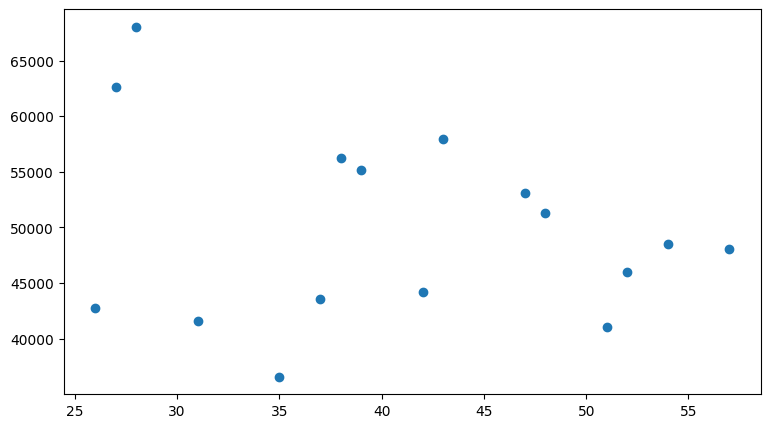

In [484]:
fig, ax= plt.subplots(figsize= (9,5))

ax.scatter(engineers_ages["Age"], engineers_ages["Salary"])

## Exercise 1

In [485]:
tables= pd.read_html("https://en.wikipedia.org/wiki/2024_Summer_Olympics")

### a)

In [486]:
for i in range(len(tables)):
    print(f"Table: {i} \n{tables[i]}")

Table: 0 
                                                    0  \
0                  Emblem of the 2024 Summer Olympics   
1                                            Location   
2                                               Motto   
3                                             Nations   
4                                            Athletes   
5                                              Events   
6                                             Opening   
7                                             Closing   
8                                           Opened by   
9                                            Cauldron   
10                                              Venue   
11  Summer← Tokyo 2020Los Angeles 2028 → Winter← B...   

                                                    1  
0                  Emblem of the 2024 Summer Olympics  
1                                       Paris, France  
2   Games Wide Open (French: Ouvrons Grand les Jeu...  
3                204 (in

In [487]:
sports= tables[11]

In [488]:
sports["Events"]["Events"].dropna()

0                —
1                2
2                8
3                2
4               35
5                2
6                5
7               48
8                5
9                2
10               2
11              13
12               2
13               6
14              10
15               4
16              12
17               4
18               2
20               2
21               2
22               2
23              12
24               2
25               2
26               2
27              14
28               2
29               2
30               2
31              15
32               2
33              14
34               2
35              10
36              15
37               4
38               4
39               2
40               5
41               8
42               5
43               3
44               2
45               2
46              10
47              18
48             329
49             329
51    Total events
52    Total events
Name: Events, dtype: object

In [489]:
sports_mask= pd.to_numeric(sports["Events"]["Events"], errors="coerce").notna()

In [490]:
filtred_events= sports["Events"]["Events"][sports_mask]

In [491]:
sports["Events"]= filtred_events.astype(int)

In [492]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   (July/August 2024, July/August 2024)    53 non-null     object 
 1   (July/August 2024, July/August 2024.1)  52 non-null     object 
 2   (July, 24th Wed)                        6 non-null      object 
 3   (July, 25th Thu)                        8 non-null      object 
 4   (July, 26th Fri)                        5 non-null      object 
 5   (July, 27th Sat)                        27 non-null     object 
 6   (July, 28th Sun)                        29 non-null     object 
 7   (July, 29th Mon)                        29 non-null     object 
 8   (July, 30th Tue)                        28 non-null     object 
 9   (July, 31st Wed)                        29 non-null     object 
 10  (August, 1st Thu)                       29 non-null     object 


In [493]:
sports["Events"][:48].sum()

Events    329.0
dtype: float64

### b)


In [494]:
medal= tables[12]
medal

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States‡,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France*,16,26,22,64
5,6,Netherlands,15,7,12,34
6,7,Great Britain,14,22,29,65
7,8,South Korea,13,9,10,32
8,9,Italy,12,13,15,40
9,10,Germany,12,13,8,33


In [495]:
medal.sort_values(by= "Total", ascending=False, inplace=True)

In [496]:
medal= medal[2:]
medal.head(5)

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States‡,40,44,42,126
1,2,China,40,27,24,91
6,7,Great Britain,14,22,29,65
4,5,France*,16,26,22,64
3,4,Australia,18,19,16,53


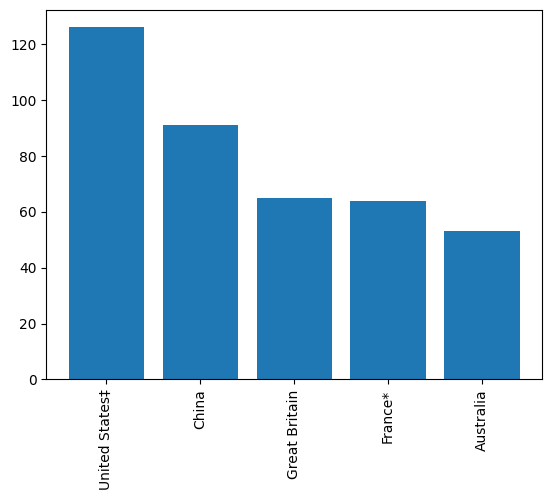

In [497]:
plt.bar(medal["NOC"].head(5), medal["Total"].head(5))
plt.xticks(rotation=90);

### c)

In [498]:
medal_by_gold= medal.sort_values(by= "Gold", ascending=False)

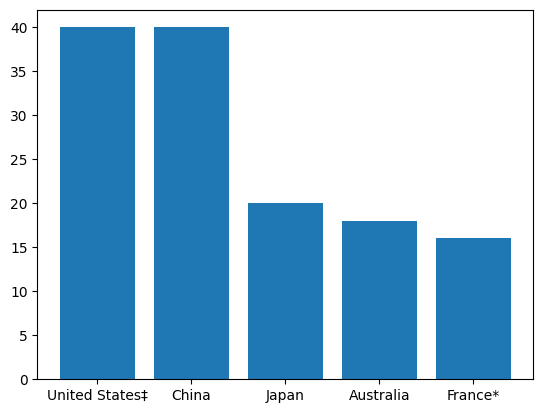

In [499]:
plt.bar(medal_by_gold["NOC"].head(5), medal_by_gold["Gold"].head(5));

### e)

In [500]:
venues= pd.concat(tables[3:8])

In [501]:
unique_venues= venues["Venue"].unique()
len(unique_venues)

43

### f)

In [502]:
venues["Status"].value_counts().get("Built for the Games")

4

In [503]:
built_for_games= venues[venues["Status"]== "Built for the Games"]
len(built_for_games)

4

### g)

In [504]:
built_for_games["Capacity"]

5               8000
6               8000
7               5000
3    18,000 athletes
Name: Capacity, dtype: object

In [505]:
built_for_games.loc[:,"Capacity"]= built_for_games["Capacity"].apply(lambda x: x.replace(",", "") if isinstance(x, str) else x)

In [506]:
built_for_games.loc[:,"Capacity"]= built_for_games["Capacity"].apply(lambda x: x[:5] if isinstance(x, str) else x)

In [507]:
try:
    built_for_games = built_for_games.astype({"Capacity": int})
except ValueError as err:
    print(err)

In [508]:
#built_for_games.loc[:,"Capacity"]= built_for_games["Capacity"].astype(int)
# Changes the value but not type with .loc[]

In [509]:
built_for_games_capacity= built_for_games["Capacity"].sum()
built_for_games_capacity

39000

### h)

In [510]:
venues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Venue     67 non-null     object
 1   Events    67 non-null     object
 2   Capacity  67 non-null     object
 3   Status    67 non-null     object
 4   Ref.      11 non-null     object
dtypes: object(5)
memory usage: 3.1+ KB


In [511]:
venue_capacity= venues[["Venue", "Capacity"]]

In [512]:
venue_capacity= venue_capacity.drop_duplicates(subset= "Venue")

In [513]:
#venue_capacity["Capacity"]= venue_capacity["Capacity"].apply(lambda x: x.replace(",", "")if isinstance(x, str) else x) found easy regex soulution down below

In [514]:
venue_capacity["Capacity"]= venue_capacity["Capacity"].apply(lambda x: x[:5] if isinstance(x, str) else x)

In [515]:
venue_capacity.tail(7)

,Venue,Capacity
3,Olympic Village,"18,00"
4,"Aranui 5, Tahiti",256 a
5,"Parc de l'Aire des Vents, Dugny",—
6,Le Bourget Exhibition Centre and Media Village...,15000
7,Paris Congress Centre,—
8,Polygone de Vincennes [fr],—
9,Tuileries Garden,—


In [516]:
import re

In [517]:
venue_capacity["Capacity"]= venue_capacity["Capacity"].apply(lambda x: re.sub(r"\D", "", x) if isinstance(x, str) else x)

In [518]:
venue_capacity["Capacity"] = pd.to_numeric(venue_capacity["Capacity"], errors='coerce')

In [519]:
venue_capacity["Capacity"]= venue_capacity["Capacity"].fillna(0)

In [520]:
try:
    venue_capacity= venue_capacity.astype({"Capacity": int})
except ValueError as err:
    print(err)

In [521]:
all_venues= venue_capacity["Capacity"].sum()

In [527]:
print(f"Byggnader byggda för os motsvarar{round((built_for_games_capacity/all_venues)*100, 2)}% av totalen")

Byggnader byggda för os motsvarar5.29% av totalen


## Exercise 2

### a)

In [528]:
print("hej")

hej
